In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import mean
from numpy import absolute
from numpy import sqrt

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from IPython.display import Image
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn import preprocessing,svm
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.pipeline import Pipeline

In [9]:
data = pd.read_csv("/content/rideshare_kaggle.csv")
data.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [10]:
data.shape

(693071, 57)

In [11]:
data.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [12]:
data.nunique(axis=0)

,0
id,693071
timestamp,36179
hour,24
day,17
month,2
datetime,31350
timezone,1
source,12
destination,12
cab_type,2


In [13]:
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,693071.000000,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000
mean,1544045709.755097,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1544043966.242997,33.457774,1544041609.570159,45.261313,1544047300.031310,29.731002,1544048034.740452,41.997343,1544047993.949826
std,689192.492586,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,691202.767271,6.467224,690195.441406,5.645046,690135.337190,7.110494,687186.191495,6.936841,691077.651976
min,1543203646.000000,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1543161600.000000,15.630000,1543122000.000000,33.510000,1543154400.000000,11.810000,1543136400.000000,28.950000,1543186800.000000
25%,1543443968.000000,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1543420800.000000,30.170000,1543399200.000000,42.570000,1543438800.000000,27.760000,1543399200.000000,36.570000,1543438800.000000
50%,1543737478.000000,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1543770000.000000,34.240000,1543726800.000000,44.680000,1543788000.000000,30.130000,1543744800.000000,40.950000,1543788000.000000
75%,1544827509.000000,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1544806800.000000,38.880000,1544788800.000000,46.910000,1544814000.000000,35.710000,1544788800.000000,44.120000,1544817600.000000
max,1545160511.000000,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1545152400.000000,43.100000,1545192000.000000,57.870000,1545109200.000000,40.050000,1545134400.000000,57.200000,1545109200.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [15]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=["total","percent"])
missing_data.head()

,total,percent
price,55095,0.079494
id,0,0.000000
ozone,0,0.000000
temperatureLowTime,0,0.000000
apparentTemperatureHigh,0,0.000000


In [16]:
len(data._get_numeric_data().columns)

46

In [17]:
categorical_cols=data.columns[data.dtypes =='object']
print(categorical_cols)

Index(['id', 'datetime', 'timezone', 'source', 'destination', 'cab_type',
       'product_id', 'name', 'short_summary', 'long_summary', 'icon'],
      dtype='object')


In [18]:
data = data.drop(['id', 'datetime', 'timezone', 'timestamp','latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',"product_id",
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime'], axis=1)

In [19]:
for j in ["price"]:
    data.loc[data.loc[:,j].isnull(),j] = data.loc[:,j].mean()
data.price.isnull().sum()

0

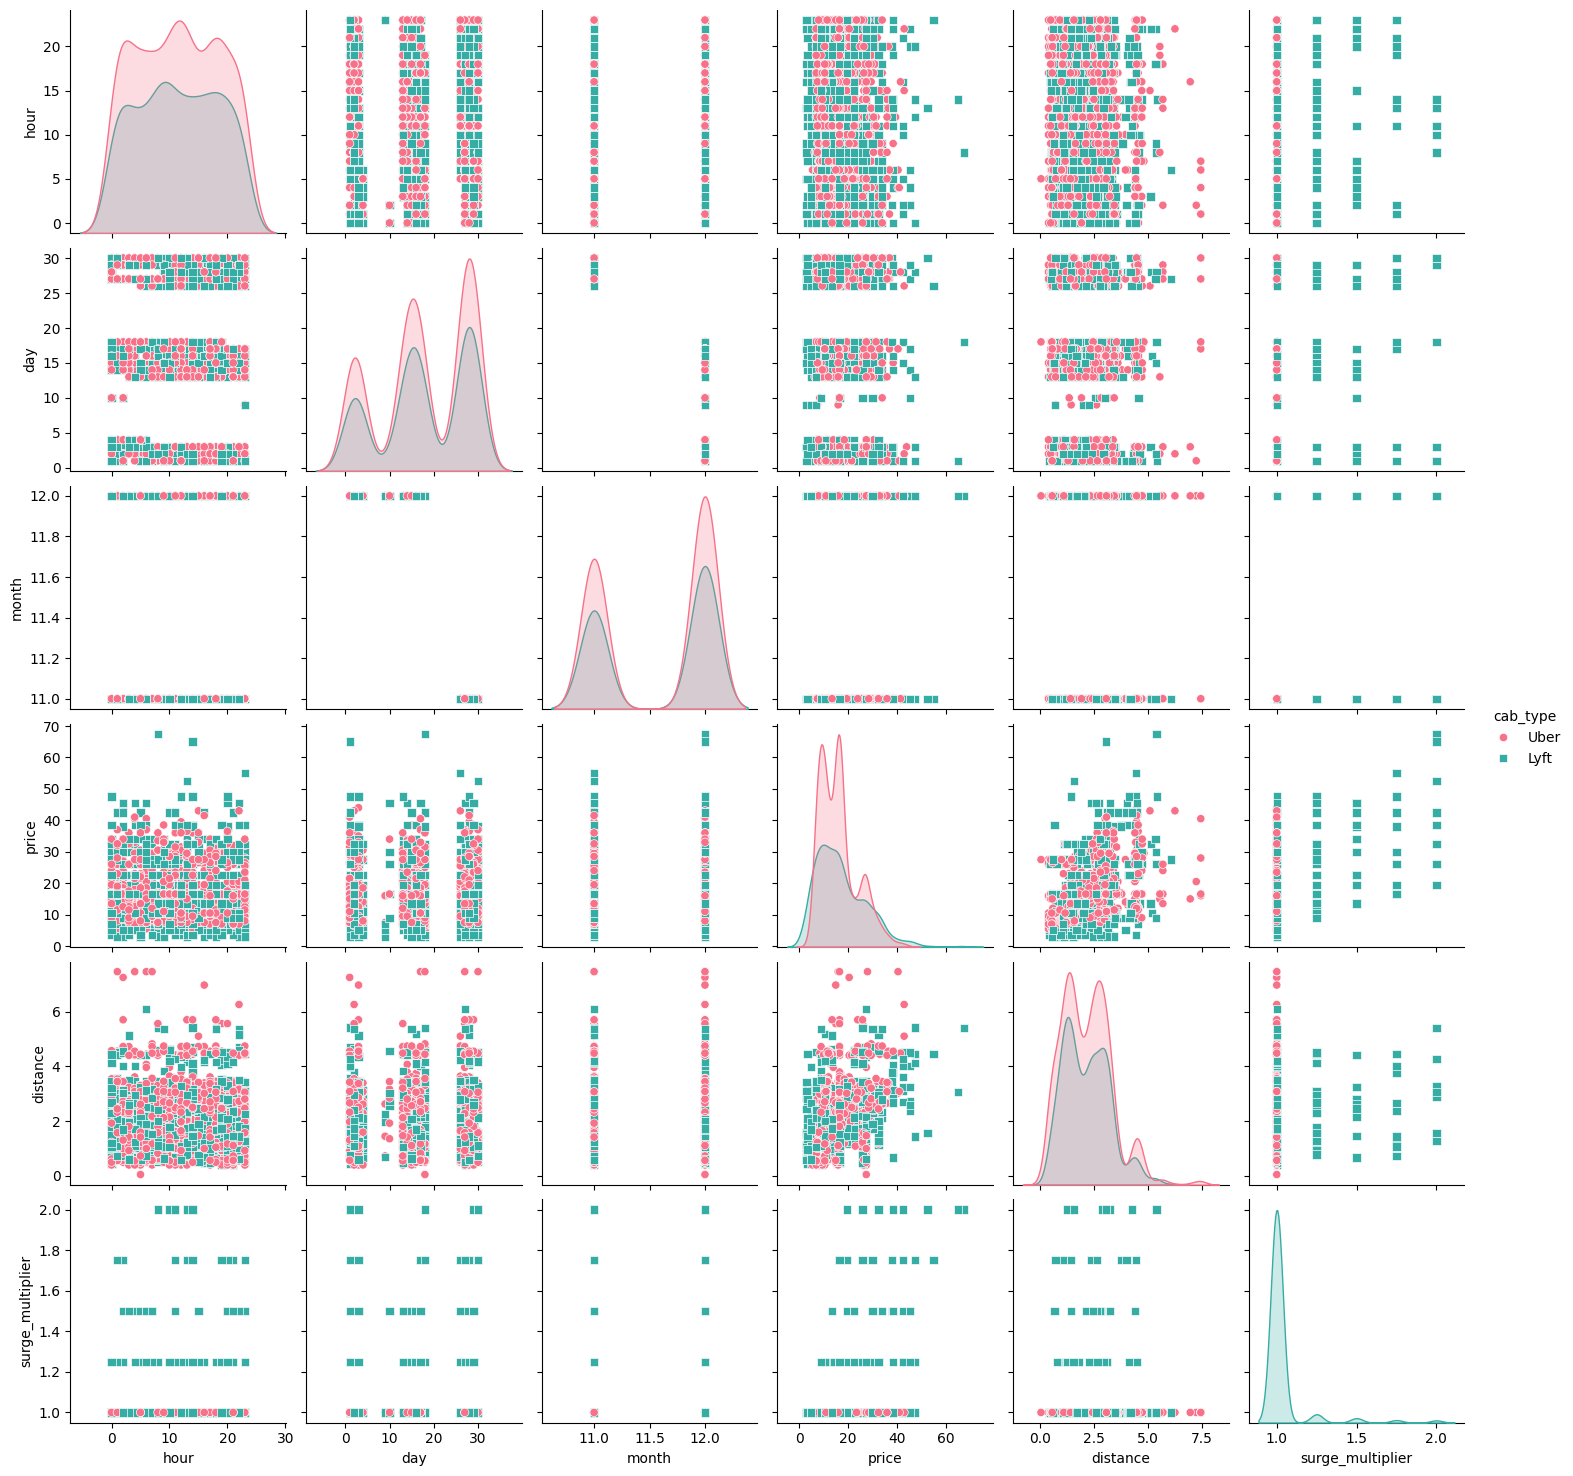

In [20]:
sns_pairplot=sns.pairplot(data.sample(2000), hue="cab_type", markers=["o","s"],diag_kind="kde",kind="scatter",palette="husl")

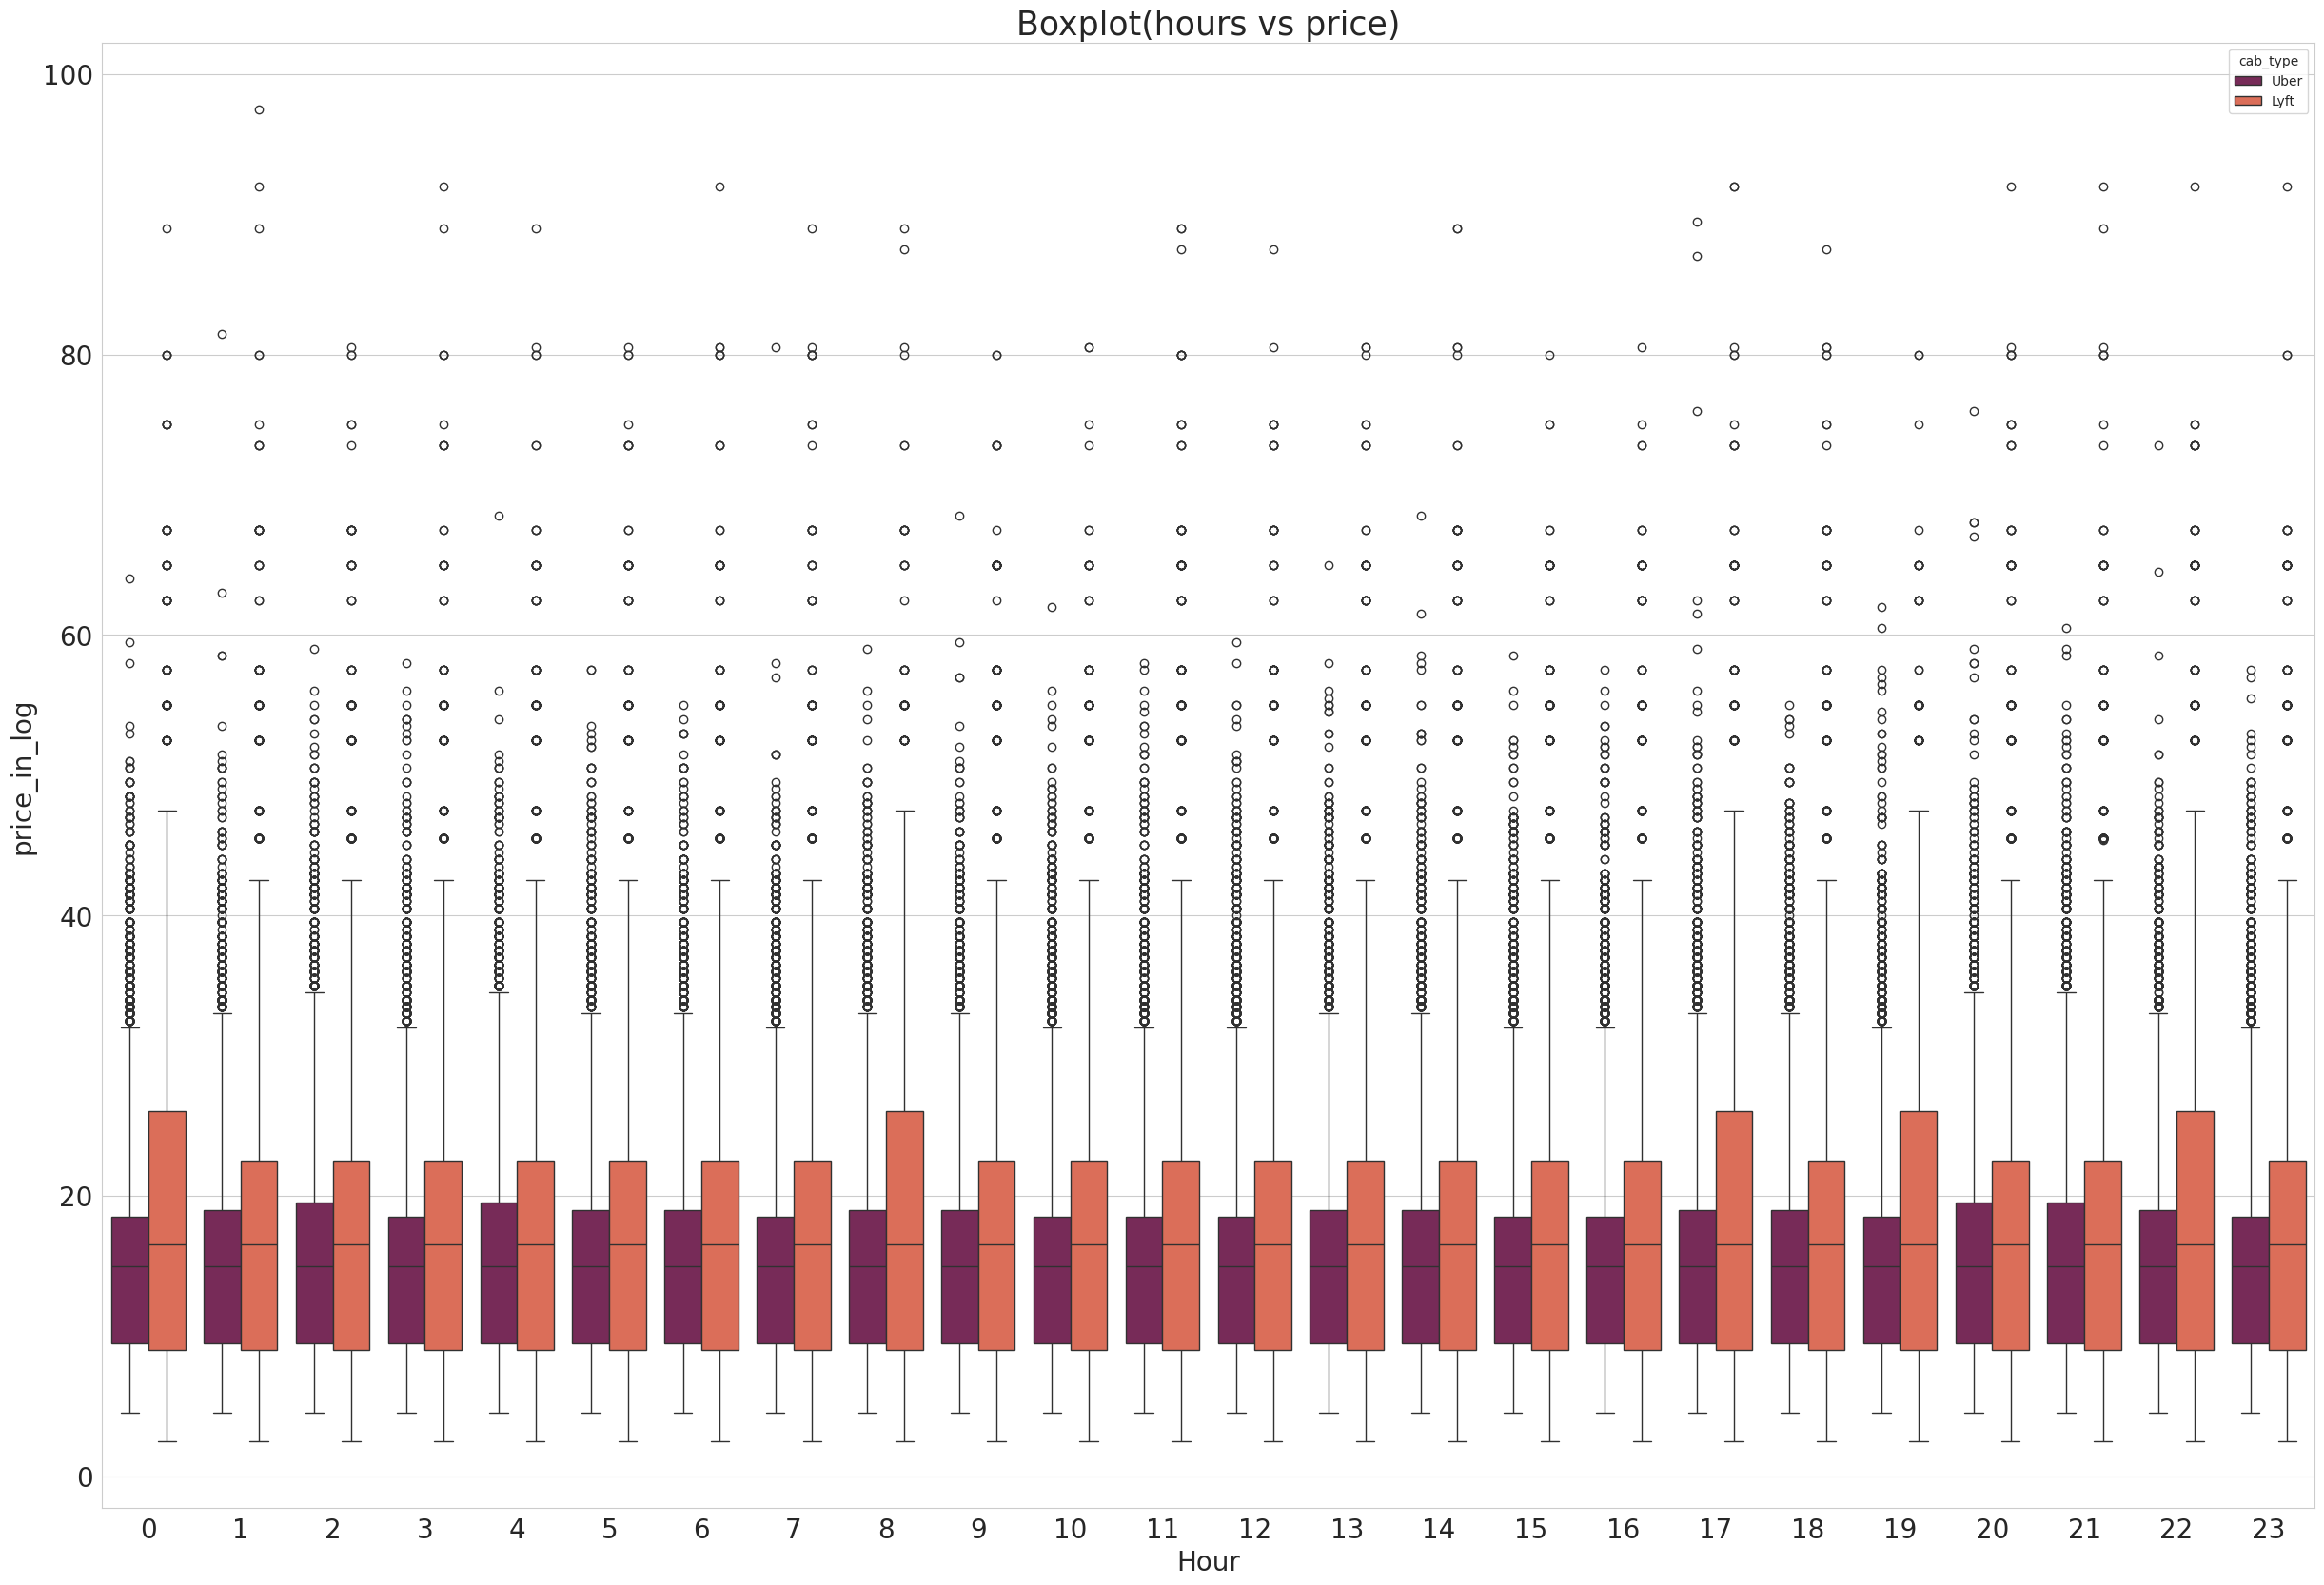

In [21]:
plt.figure(figsize=(30,20))
sns.set_style("whitegrid")
sns.boxplot(x="hour", y="price",data=data, hue="cab_type",palette="rocket")
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.xlabel("Hour",fontsize=20)
plt.ylabel("price_in_log",fontsize=20)
plt.title("Boxplot(hours vs price)",fontsize=25)
plt.show()

In [22]:
quantiles = stats.mstats.mquantiles(data["price"] , prob=[0.25,0.75])
IQR= stats.iqr(data["price"])
upper = quantiles[1]+(1.5*IQR)
lower = quantiles[0]-(1.5*IQR)
data.loc[data["price"]>upper,"price"]= np.nan
data.loc[data["price"]<lower,"price"]= np.nan
data.price.isnull().sum()

7982

In [23]:
for i in ["price"]:
    data.loc[data.loc[:,i].isnull(),i] = data.loc[:,i].mean()
data.price.isnull().sum()

0

In [24]:
corrmat = data.select_dtypes(include=['number']).corr()

<Axes: title={'center': 'Uber and Lyft Heat Map'}>

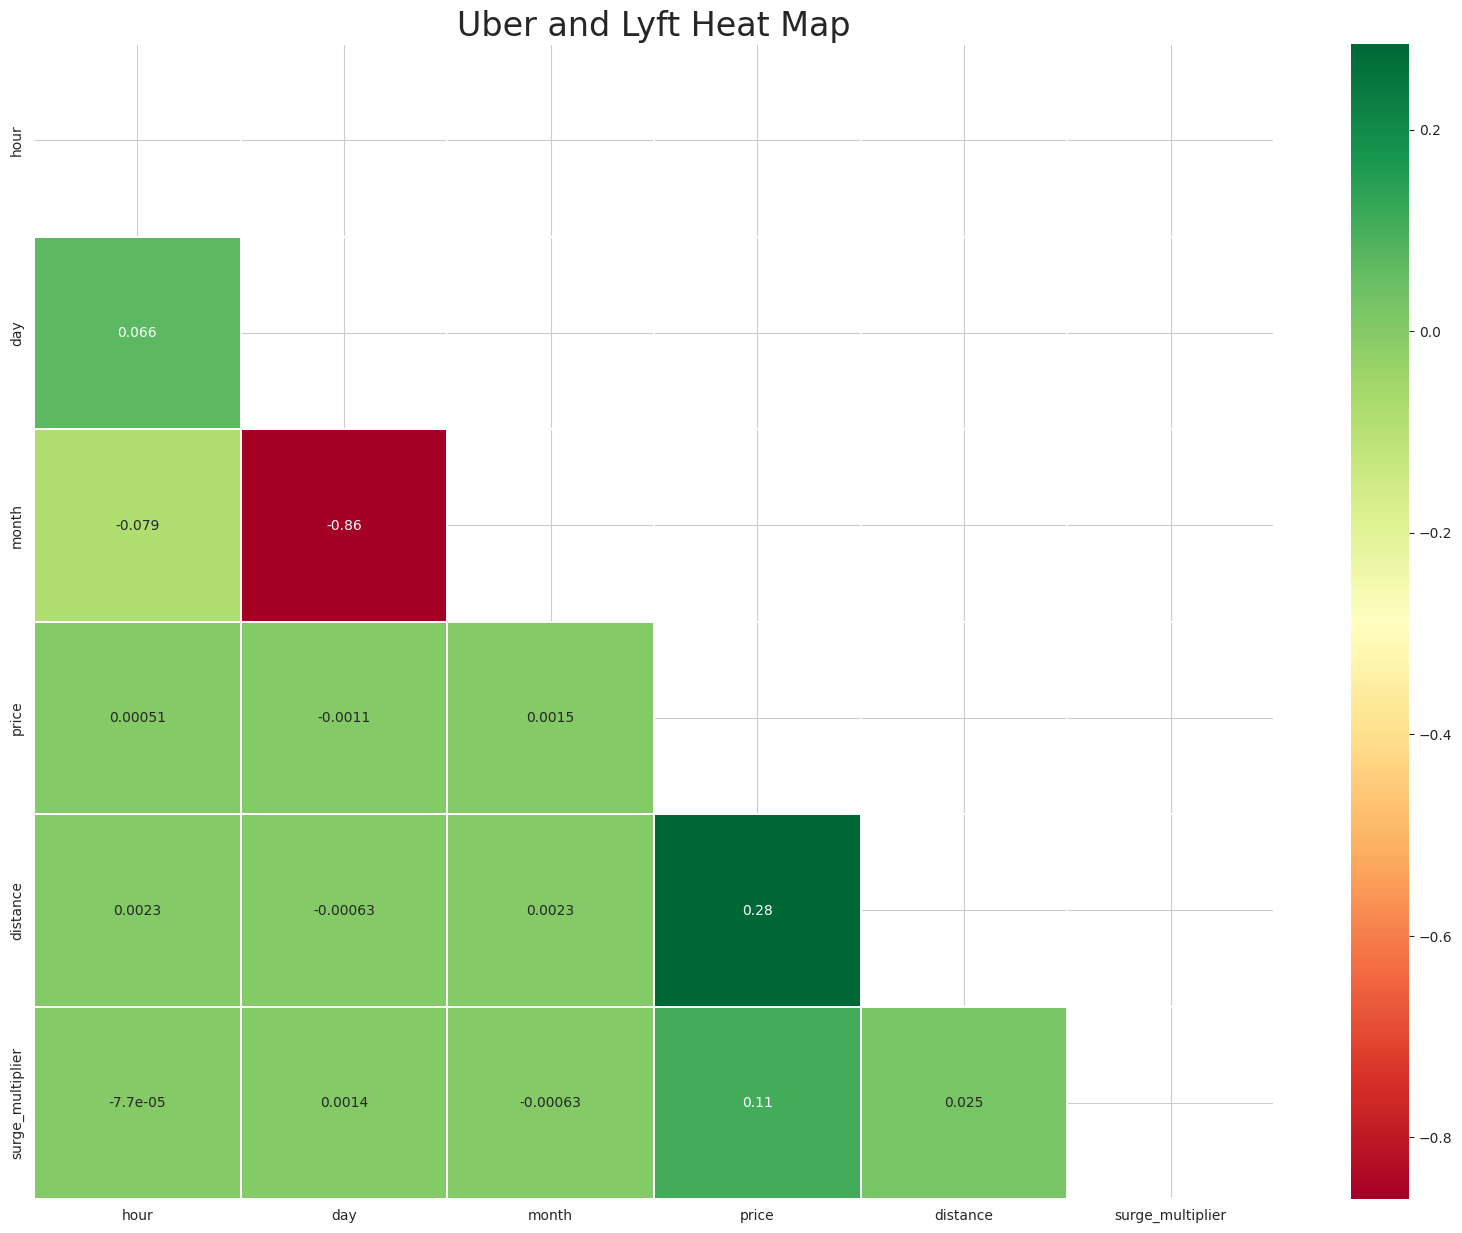

In [25]:
fig, ax = plt.subplots(figsize=(20,15))
title = "Uber and Lyft Heat Map"
plt.title(title,fontsize=24)
ttl = ax.title
ttl.set_position([0.5,1.05])
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat,mask=mask,annot=True,cmap='RdYlGn',linewidths=0.20,ax=ax)

In [26]:
categorical_cols=data.columns[data.dtypes =='object']
print(categorical_cols)
len(categorical_cols)

Index(['source', 'destination', 'cab_type', 'name'], dtype='object')


4

In [27]:
for i in categorical_cols:
  print(data[i].value_counts())

source
Financial District         58857
Theatre District           57813
Back Bay                   57792
Boston University          57764
North End                  57763
Fenway                     57757
Northeastern University    57756
South Station              57750
Haymarket Square           57736
West End                   57562
Beacon Hill                57403
North Station              57118
Name: count, dtype: int64
destination
Financial District         58851
Theatre District           57798
Back Bay                   57780
Haymarket Square           57764
Boston University          57764
Fenway                     57757
North End                  57756
Northeastern University    57755
South Station              57749
West End                   57575
Beacon Hill                57403
North Station              57119
Name: count, dtype: int64
cab_type
Uber    385663
Lyft    307408
Name: count, dtype: int64
name
UberXL          55096
WAV             55096
Black SUV       55096
B

In [28]:
numeric_cols=data._get_numeric_data().columns
print(numeric_cols)

Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier'], dtype='object')


In [30]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

ohe = OneHotEncoder()
data_encode_col = pd.DataFrame(
    ohe.fit_transform(data[categorical_cols]).toarray(),
    columns=["encoded_" + x for x in ohe.get_feature_names_out(categorical_cols)]
)

data_encode_col.head()
data_other_cols = data.drop(columns=categorical_cols)
data = pd.concat([data_encode_col, data_other_cols], axis=1)

In [32]:
data.head()

,encoded_source_Back Bay,encoded_source_Beacon Hill,encoded_source_Boston University,encoded_source_Fenway,encoded_source_Financial District,encoded_source_Haymarket Square,encoded_source_North End,encoded_source_North Station,encoded_source_Northeastern University,encoded_source_South Station,...,encoded_name_UberPool,encoded_name_UberX,encoded_name_UberXL,encoded_name_WAV,hour,day,month,price,distance,surge_multiplier
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9,16,12,5.0,0.44,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2,27,11,11.0,0.44,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,28,11,7.0,0.44,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4,30,11,26.0,0.44,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3,29,11,9.0,0.44,1.0


In [33]:
scaler= StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

In [35]:
data.head()

,encoded_source_Back Bay,encoded_source_Beacon Hill,encoded_source_Boston University,encoded_source_Fenway,encoded_source_Financial District,encoded_source_Haymarket Square,encoded_source_North End,encoded_source_North Station,encoded_source_Northeastern University,encoded_source_South Station,...,encoded_name_UberPool,encoded_name_UberX,encoded_name_UberXL,encoded_name_WAV,hour,day,month,price,distance,surge_multiplier
0,-0.301614,-0.300505,-0.301534,-0.301514,-0.304636,3.317249,-0.301532,-0.299691,-0.301512,-0.301494,...,-0.293858,-0.293866,-0.293872,-0.293872,-0.376957,-0.179755,0.839341,-1.357559,-1.536021,-0.151349
1,-0.301614,-0.300505,-0.301534,-0.301514,-0.304636,3.317249,-0.301532,-0.299691,-0.301512,-0.301494,...,-0.293858,-0.293866,-0.293872,-0.293872,-1.384425,0.922198,-1.191411,-0.628845,-1.536021,-0.151349
2,-0.301614,-0.300505,-0.301534,-0.301514,-0.304636,3.317249,-0.301532,-0.299691,-0.301512,-0.301494,...,-0.293858,-0.293866,-0.293872,-0.293872,-1.528349,1.022375,-1.191411,-1.114654,-1.536021,-0.151349
3,-0.301614,-0.300505,-0.301534,-0.301514,-0.304636,3.317249,-0.301532,-0.299691,-0.301512,-0.301494,...,-0.293858,-0.293866,-0.293872,-0.293872,-1.096577,1.222730,-1.191411,1.192938,-1.536021,-0.151349
4,-0.301614,-0.300505,-0.301534,-0.301514,-0.304636,3.317249,-0.301532,-0.299691,-0.301512,-0.301494,...,-0.293858,-0.293866,-0.293872,-0.293872,-1.240501,1.122553,-1.191411,-0.871750,-1.536021,-0.151349


In [36]:
data.shape

(693071, 45)

In [37]:
data.dropna(inplace = True)
X=data.drop(['price'],axis=1)
y=data['price']

instances = X.shape[0]
features = X.shape[1]

# Converting each dataframe into a numpy array since each dataframe contains only one column
X = np.array(X).reshape(-1, features)
y = np.array(y).reshape(-1, 1)

identity_vector = np.asarray([[1 for num in range(instances)]])
identity_vector = identity_vector.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=40)
# print(X_train, X_test, y_train)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)
print("Training set mean:", X_train.mean(), y_train.mean())
print("Testing set mean:", X_test.mean(), y_test.mean())
print("Training set standard deviation:", X_train.std(), y_train.std())
print("Testing set standard deviation:", X_test.std(), y_test.std())

Training set shape: (554456, 44) (554456, 1)
Testing set shape: (138615, 44) (138615, 1)
Training set mean: -2.124310478650521e-05 -0.00032480055681517354
Testing set mean: 8.497180613571272e-05 0.0012991928545252468
Training set standard deviation: 0.9999617016235108 0.9990762967096172
Testing set standard deviation: 1.0001531732236146 1.0036852346455714


In [38]:
def evaluate_model(test,pred):
    #print(test,pred)
    print("R^2:", r2_score(test, pred))
    print("MAE:", mean_absolute_error(test,pred))
    print("RMSE:",np.sqrt(mean_squared_error(test, pred)))
    print("")

def create_mini_batches(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    i = 0

    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

def perform_lr(X_train,X_test,train_y, test_y):
    #X_train = np.append(X_train,identity_vector[:X_train.shape[0],:],1)
    #X_test = np.append(X_test,identity_vector[:X_test.shape[0],:],1)
    lr = LinearRegression()
    lr.fit(X_train,train_y)
    y_val_pred = lr.predict(X_test)
    y_train_pred = lr.predict(X_train)

    print('Shape:',X_train.shape)
    print('Rank:',np.linalg.matrix_rank(X_train))
    print('coeff:',lr.coef_)
    #Test linear regression model
    print("Training Loss")
    evaluate_model(train_y,y_train_pred)
    print("Validation Loss")
    evaluate_model(test_y,y_val_pred)


def perform_sgd(X_train,train_y, X_test, test_y,alpha=0.0001, epsilon=0.1, eta0=0.01,penalty=None,learning_rate='invscaling',batchsize=1):
    print("penalty term:",penalty,",learning rate:",learning_rate,",batch size:",batchsize)
#     print(train_y)
    X_train = np.append(X_train,identity_vector[:X_train.shape[0],:],1)
    X_test = np.append(X_test,identity_vector[:X_test.shape[0],:],1)
#     print(X_train.shape)
#     print('Rank:',np.linalg.matrix_rank(X_train))
    model = SGDRegressor(alpha=alpha, epsilon=epsilon, eta0=eta0,penalty=penalty, learning_rate=learning_rate)
    if batchsize > 1:
        batcherator = create_mini_batches(X_train, train_y,batch_size=batchsize)
        for X_chunk, y_chunk in batcherator:
            y_chunk = y_chunk.squeeze(1)
            model.partial_fit(X_chunk, y_chunk)
    else:
        train_y = train_y.squeeze(1)
        model.fit(X_train, train_y)

    y_val_predicted = model.predict(X_test)
    print("validation loss")
    evaluate_model(test_y,y_val_predicted)

    y_train_predicted = model.predict(X_train)
    print("training loss")
    evaluate_model(train_y,y_train_predicted)



def perform_pr(X_train,X_test,train_y,test_y):
    p = preprocessing.PolynomialFeatures(degree=2)
    X_train_poly = p.fit_transform(X_train)
    X_test_poly = p.fit_transform(X_test)
    X_train_poly = np.append(X_train,identity_vector[:X_train.shape[0],:],1)
    X_test_poly = np.append(X_test,identity_vector[:X_test.shape[0],:],1)
    pr = LinearRegression()
    pr.fit(X_train_poly,train_y)
    y_val_pred = pr.predict(X_test_poly)
    #Test plynomial regression model
    print("validation loss")
    evaluate_model(test_y,y_val_pred)



def add_poly(X_train,X_test):
    p = preprocessing.PolynomialFeatures(degree=2)
    X_train_poly = p.fit_transform(X_train[:,:7])
    X_test_poly = p.fit_transform(X_test[:,:7])
    X_train_poly = StandardScaler().fit_transform(X_train_poly)
    X_test_poly = StandardScaler().fit_transform(X_test_poly)
#     print(X_train_poly.shape,X_train[:,8:].shape)
    X_train_poly = np.append(X_train_poly,X_train[:,8:],1)
    X_test_poly = np.append(X_test_poly,X_test[:,8:],1)
    return X_train_poly,X_test_poly

def perform_ridge(X_train,train_y,X_test,test_y,alpha=0.5):
    rdg = Ridge(alpha = alpha)
    print("alpha:",alpha)
    rdg.fit(X_train, train_y)
    pred_test_rr= rdg.predict(X_test)
    print("Validation loss")
    evaluate_model(test_y,pred_test_rr)
    y_train_predicted = rdg.predict(X_train)
    print("training loss")
    evaluate_model(train_y,y_train_predicted)


def perform_l(X_train,y_train,X_test,test_y,alpha=0.1):
    model_lasso = Lasso(alpha=alpha)
    model_lasso.fit(X_train, y_train)
    pred_train_lasso= model_lasso.predict(X_test)
    print("alpha:",alpha)
    print("validation loss")
    evaluate_model(test_y,pred_train_lasso)
    y_train_predicted = model_lasso.predict(X_train)
    print("training loss")
    evaluate_model(y_train,y_train_predicted)



def perform_en(X_train, y_train,X_test,test_y,alpha=0.1,l1=0.5):
    model = ElasticNet(alpha=alpha,l1_ratio=l1)
    model.fit(X_train, y_train)
    pred_test = model.predict(X_test)
    print("alpha:",alpha,",l1 ratio:",l1)
    print("validation loss")
    evaluate_model(test_y,pred_test)
    pred_train = model.predict(X_train)

    print("alpha:",alpha,",l1 ratio:",l1)
    print("training loss")
    evaluate_model(y_train,pred_train)




def k_fold_closed(X_train,y_train):
    model = Ridge(alpha=0.000000000000000000000000000000001)
#     model = LinearRegression()
    pipeline = Pipeline([('transformer', StandardScaler()), ('estimator', model)])
#     pipeline = Pipeline([('transformer', StandardScaler()), ('model', TransformedTargetRegressor(regressor=model,transformer=StandardScaler()))])


    cv = KFold(n_splits=4, random_state=20, shuffle=True)

    print('Rank:',np.linalg.matrix_rank(X_train))
#     X_train = np.append(X_train,identity_vector[:X_train.shape[0],:],1)
    print('Rank:',np.linalg.matrix_rank(X_train))
    print('Shape:',X_train.shape)
#     X_train = StandardScaler().fit_transform(X_train)
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error',
                             cv=cv, n_jobs=-1)
    print(X_train)
    print(scores)
    #view RMSE
    return sqrt(mean(absolute(scores)))

def k_fold_sgd(X_train,train_y):
    cv = KFold(n_splits=4, random_state=1, shuffle=True)
    model = SGDRegressor()
    sgd_x = StandardScaler().fit_transform(X_train)
    sgd_y = train_y.squeeze(1)
    sgd_x = np.append(sgd_x,identity_vector[:sgd_x.shape[0],:],1)
    scores = cross_val_score(model, sgd_x, sgd_y, scoring='neg_mean_absolute_error',
                             cv=cv, n_jobs=-1)
    print(scores)
    #view RMSE
    return sqrt(mean(absolute(scores)))

In [39]:
perform_lr(X_train,X_test,y_train, y_test)

Shape: (554456, 44)
Rank: 38
coeff: [[-1.16251051e-03 -7.07695414e-03 -4.67647088e-03  8.22488452e-04
  -1.67870448e-02 -2.98378888e-03  1.06648411e-02  4.77794136e-03
  -2.47235964e-03  4.95473408e-03  1.03835227e-02  3.70533936e-03
   4.51013135e-03 -3.56134302e-03 -4.95327787e-03 -2.91145903e-03
  -9.58477802e-03 -8.08219657e-05 -1.04694390e-03  7.36172025e-03
   7.49052154e-03 -4.80786444e-03  6.97048238e-03  7.20856697e-04
   1.52543850e-02 -1.52543850e-02  1.50383096e-01  4.44409707e-01
   3.51009200e-02  1.89898908e-01  3.95803177e-01 -2.21510552e-01
  -4.14841606e-02 -3.28850044e-01  2.16587333e-02 -2.34213812e-01
  -2.00982331e-01 -8.11579507e-03 -2.01166458e-01  7.15598636e-05
  -4.10833752e-04  9.90891260e-04  2.89745053e-01  5.82528289e-02]]
Training Loss
R^2: 0.861828064281484
MAE: 0.23366171220256451
RMSE: 0.3713715038439607

Validation Loss
R^2: 0.8619328466937528
MAE: 0.23507085486191903
RMSE: 0.372943223699692



In [40]:
perform_sgd(X_train,y_train, X_test, y_test,penalty='elasticnet',learning_rate='constant',batchsize=5)
perform_sgd(X_train,y_train, X_test, y_test,penalty='l1',learning_rate='optimal',batchsize=10)
perform_sgd(X_train,y_train, X_test, y_test,penalty='l2',learning_rate='adaptive',batchsize=100)
perform_sgd(X_train,y_train, X_test, y_test,penalty='l2',learning_rate='invscaling',batchsize=50)
perform_sgd(X_train,y_train, X_test, y_test)

penalty term: elasticnet ,learning rate: constant ,batch size: 5
validation loss
R^2: 0.7133439174722479
MAE: 0.3486397966929624
RMSE: 0.537375813974099

training loss
R^2: 0.7099533973419216
MAE: 0.34719584345370824
RMSE: 0.538062279045293

penalty term: l1 ,learning rate: optimal ,batch size: 10
validation loss
R^2: 0.7583892986720625
MAE: 0.35993239940356675
RMSE: 0.49335055172402725

training loss
R^2: 0.7563872028355714
MAE: 0.3597247166620841
RMSE: 0.4931155575896908

penalty term: l2 ,learning rate: adaptive ,batch size: 100
validation loss
R^2: 0.1402577880477558
MAE: 0.4714722587495254
RMSE: 0.9306398828996679

training loss
R^2: 0.14355616361580492
MAE: 0.46972527183895224
RMSE: 0.9245876741264002

penalty term: l2 ,learning rate: invscaling ,batch size: 50
validation loss
R^2: 0.859974669010453
MAE: 0.24050344148763358
RMSE: 0.3755786003877505

training loss
R^2: 0.860109464238207
MAE: 0.23894102443808016
RMSE: 0.3736739493514761

penalty term: None ,learning rate: invscalin

In [41]:
#Train model using polynomial regression(Closed form)

perform_pr(X_train,X_test, y_train,y_test)

validation loss
R^2: 0.8619328466937528
MAE: 0.23507085486191903
RMSE: 0.372943223699692



In [42]:
#Train model using polynomial regression(SGD)

#Add polynomial features
X_train_poly,X_test_poly = add_poly(X_train,X_test)

perform_sgd(X_train_poly,y_train, X_test_poly, y_test,penalty='elasticnet',learning_rate='constant',batchsize=5)
perform_sgd(X_train_poly,y_train, X_test_poly, y_test,penalty='l1',learning_rate='optimal',batchsize=10)
perform_sgd(X_train_poly,y_train, X_test_poly, y_test,penalty='l2',learning_rate='adaptive',batchsize=100)
perform_sgd(X_train_poly,y_train, X_test_poly, y_test)

penalty term: elasticnet ,learning rate: constant ,batch size: 5
validation loss
R^2: 0.8068487245948832
MAE: 0.3099376208171587
RMSE: 0.4411094128758731

training loss
R^2: 0.8059341529357543
MAE: 0.3092206571161581
RMSE: 0.44012213546201806

penalty term: l1 ,learning rate: optimal ,batch size: 10
validation loss
R^2: 0.4537898062635721
MAE: 0.5597048704426754
RMSE: 0.7417839559141202

training loss
R^2: 0.4513214302765257
MAE: 0.5585211128419333
RMSE: 0.7400441915661752

penalty term: l2 ,learning rate: adaptive ,batch size: 100
validation loss
R^2: 0.7342310101229662
MAE: 0.36498290571546277
RMSE: 0.5174277161613892

training loss
R^2: 0.733824684416298
MAE: 0.3643098254333245
RMSE: 0.5154452528273259

penalty term: None ,learning rate: invscaling ,batch size: 1
validation loss
R^2: 0.8600146121511645
MAE: 0.23630056254330306
RMSE: 0.3755250284419829

training loss
R^2: 0.8600111322683375
MAE: 0.23494339865222064
RMSE: 0.37380525787978197



In [43]:
k_fold_closed(X_train, y_train)

Rank: 38
Rank: 38
Shape: (554456, 44)
[[-0.30161408 -0.30050529 -0.30153436 ...  0.83934123 -0.46484585
  -0.15134887]
 [ 3.31549508 -0.30050529 -0.30153436 ...  0.83934123 -0.42094524
  -0.15134887]
 [-0.30161408 -0.30050529 -0.30153436 ...  0.83934123 -0.95653276
  -0.15134887]
 ...
 [-0.30161408 -0.30050529 -0.30153436 ... -1.19141056 -0.90385202
  -0.15134887]
 [-0.30161408 -0.30050529 -0.30153436 ... -1.19141056 -0.39460487
  -0.15134887]
 [-0.30161408 -0.30050529 -0.30153436 ...  0.83934123 -0.01705956
  -0.15134887]]
[-0.23342017 -0.23351016 -0.23392584 -0.23449829]


0.48356862456192656

In [44]:
k_fold_sgd(X_train,y_train)

[-0.23626032 -0.23362418 -0.2342611  -0.23524122]


0.4846098472898928

In [45]:
k_fold_closed(X_train_poly, y_train)

Rank: 39
Rank: 39
Shape: (554456, 72)
[[ 0.         -0.30203546 -0.3007894  ...  0.83934123 -0.46484585
  -0.15134887]
 [ 0.          3.31086954 -0.3007894  ...  0.83934123 -0.42094524
  -0.15134887]
 [ 0.         -0.30203546 -0.3007894  ...  0.83934123 -0.95653276
  -0.15134887]
 ...
 [ 0.         -0.30203546 -0.3007894  ... -1.19141056 -0.90385202
  -0.15134887]
 [ 0.         -0.30203546 -0.3007894  ... -1.19141056 -0.39460487
  -0.15134887]
 [ 0.         -0.30203546 -0.3007894  ...  0.83934123 -0.01705956
  -0.15134887]]
[-0.23518269 -0.23346571 -0.24320854 -0.23770723]


0.4872279140173245

In [46]:
k_fold_sgd(X_train_poly,y_train)

[-0.2397538  -0.23234567 -0.24027904 -0.23532994]


0.4867515925942968

In [47]:
perform_ridge(X_train,y_train,X_test,y_test,alpha=0.000000001)
perform_ridge(X_train,y_train,X_test,y_test,alpha=0.5)
perform_ridge(X_train,y_train,X_test,y_test,alpha=5)
perform_ridge(X_train,y_train,X_test,y_test,alpha=1000)

alpha: 1e-09


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.11934e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Validation loss
R^2: 0.8619328466937523
MAE: 0.23507085486191912
RMSE: 0.3729432236996928

training loss
R^2: 0.8618280642814838
MAE: 0.23366171220256407
RMSE: 0.3713715038439609

alpha: 0.5
Validation loss
R^2: 0.8619328428283652
MAE: 0.23507090477262857
RMSE: 0.3729432289202318

training loss
R^2: 0.8618280642808281
MAE: 0.23366176018319768
RMSE: 0.371371503844842

alpha: 5
Validation loss
R^2: 0.8619328079813877
MAE: 0.23507135396945758
RMSE: 0.37294327598408006

training loss
R^2: 0.8618280642159064
MAE: 0.23366219211031075
RMSE: 0.3713715039320888

alpha: 1000
Validation loss
R^2: 0.8619225286208837
MAE: 0.23517457238531594
RMSE: 0.37295715888766123

training loss
R^2: 0.8618254523243127
MAE: 0.23376143019732917
RMSE: 0.3713750139702158



In [48]:
perform_l(X_train, y_train,X_test,y_test,alpha=0.0000000001)
perform_l(X_train, y_train,X_test,y_test,alpha=0.1)
perform_l(X_train, y_train,X_test,y_test,alpha=5)
perform_l(X_train, y_train,X_test,y_test,alpha=100)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.622e+03, tolerance: 5.534e+01
  model = cd_fast.enet_coordinate_descent(


alpha: 1e-10
validation loss
R^2: 0.861932846693331
MAE: 0.23507085485754492
RMSE: 0.3729432237002618

training loss
R^2: 0.8618280642814841
MAE: 0.23366171219721604
RMSE: 0.3713715038439606

alpha: 0.1
validation loss
R^2: 0.7579664691277564
MAE: 0.38277903411940556
RMSE: 0.49378205579517426

training loss
R^2: 0.7580312395475854
MAE: 0.38110373036219736
RMSE: 0.49144882971320697

alpha: 5
validation loss
R^2: -2.6180229866223925e-06
MAE: 0.8008473084119796
RMSE: 1.0036865484802193

training loss
R^2: 0.0
MAE: 0.7973463512345691
RMSE: 0.9990762967096172

alpha: 100
validation loss
R^2: -2.6180229866223925e-06
MAE: 0.8008473084119796
RMSE: 1.0036865484802193

training loss
R^2: 0.0
MAE: 0.7973463512345691
RMSE: 0.9990762967096172



In [49]:
perform_en(X_train, y_train,X_test,y_test,alpha=0.0000000001,l1=0.5)
perform_en(X_train, y_train,X_test,y_test,alpha=0.1,l1=0.8)
perform_en(X_train, y_train,X_test,y_test,alpha=5,l1=0.5)
perform_en(X_train, y_train,X_test,y_test,alpha=100,l1=0.2)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.647e+03, tolerance: 5.534e+01
  model = cd_fast.enet_coordinate_descent(


alpha: 1e-10 ,l1 ratio: 0.5
validation loss
R^2: 0.8619328466933547
MAE: 0.2350708548623474
RMSE: 0.37294322370022975

alpha: 1e-10 ,l1 ratio: 0.5
training loss
R^2: 0.861828064281484
MAE: 0.2336617122024007
RMSE: 0.37137150384396067

alpha: 0.1 ,l1 ratio: 0.8
validation loss
R^2: 0.7867655674570522
MAE: 0.35012721582295053
RMSE: 0.4634748820668961

alpha: 0.1 ,l1 ratio: 0.8
training loss
R^2: 0.7868509241562686
MAE: 0.348479899743694
RMSE: 0.4612542516910213

alpha: 5 ,l1 ratio: 0.5
validation loss
R^2: -2.6180229866223925e-06
MAE: 0.8008473084119796
RMSE: 1.0036865484802193

alpha: 5 ,l1 ratio: 0.5
training loss
R^2: 0.0
MAE: 0.7973463512345691
RMSE: 0.9990762967096172

alpha: 100 ,l1 ratio: 0.2
validation loss
R^2: -2.6180229866223925e-06
MAE: 0.8008473084119796
RMSE: 1.0036865484802193

alpha: 100 ,l1 ratio: 0.2
training loss
R^2: 0.0
MAE: 0.7973463512345691
RMSE: 0.9990762967096172



In [50]:
perform_ridge(X_train_poly,y_train,X_test_poly,y_test,alpha=0)
perform_ridge(X_train_poly,y_train,X_test_poly,y_test,alpha=0.000000001)
perform_ridge(X_train_poly,y_train,X_test_poly,y_test,alpha=0.5)
perform_ridge(X_train_poly,y_train,X_test_poly,y_test,alpha=5)
perform_ridge(X_train_poly,y_train,X_test_poly,y_test,alpha=1000)

alpha: 0
Validation loss
R^2: -6.690528722663128e+21
MAE: 60302673812.27661
RMSE: 82097088394.90273

training loss
R^2: 0.8605161254332659
MAE: 0.23566130477986394
RMSE: 0.37313041976025463

alpha: 1e-09
Validation loss
R^2: 0.8619329849911621
MAE: 0.23507170370306538
RMSE: 0.3729430369170529

training loss
R^2: 0.861828064281484
MAE: 0.2336617122025647
RMSE: 0.3713715038439608

alpha: 0.5
Validation loss
R^2: 0.8619329481501056
MAE: 0.23507167698979323
RMSE: 0.37294308667410236

training loss
R^2: 0.8618280642808309
MAE: 0.23366176079273718
RMSE: 0.37137150384483825

alpha: 5
Validation loss
R^2: 0.8619329128611364
MAE: 0.23507213160034537
RMSE: 0.37294313433491666

training loss
R^2: 0.8618280642161844
MAE: 0.233662198206677
RMSE: 0.37137150393171514

alpha: 1000
Validation loss
R^2: 0.8619225489597883
MAE: 0.23517654978778746
RMSE: 0.3729571314192398

training loss
R^2: 0.8618254629282518
MAE: 0.23376265689273606
RMSE: 0.37137499971998594



In [51]:
perform_l(X_train_poly,y_train,X_test_poly,y_test,alpha=0.0000000001)
perform_l(X_train_poly,y_train,X_test_poly,y_test,alpha=0.1)
perform_l(X_train_poly,y_train,X_test_poly,y_test,alpha=5)
perform_l(X_train_poly,y_train,X_test_poly,y_test,alpha=100)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.474e+03, tolerance: 5.534e+01
  model = cd_fast.enet_coordinate_descent(


alpha: 1e-10
validation loss
R^2: 0.8619330734165542
MAE: 0.23507071253164294
RMSE: 0.3729429174908469

training loss
R^2: 0.861828064281484
MAE: 0.23366171220311557
RMSE: 0.37137150384396067

alpha: 0.1
validation loss
R^2: 0.7579664691277564
MAE: 0.38277903411940556
RMSE: 0.49378205579517426

training loss
R^2: 0.7580312395475854
MAE: 0.38110373036219736
RMSE: 0.49144882971320697

alpha: 5
validation loss
R^2: -2.6180229866223925e-06
MAE: 0.8008473084119796
RMSE: 1.0036865484802193

training loss
R^2: 0.0
MAE: 0.7973463512345691
RMSE: 0.9990762967096172

alpha: 100
validation loss
R^2: -2.6180229866223925e-06
MAE: 0.8008473084119796
RMSE: 1.0036865484802193

training loss
R^2: 0.0
MAE: 0.7973463512345691
RMSE: 0.9990762967096172



In [52]:
perform_en(X_train_poly,y_train,X_test_poly,y_test,alpha=0.0000000001,l1=0.5)
perform_en(X_train_poly,y_train,X_test_poly,y_test,alpha=0.1,l1=0.8)
perform_en(X_train_poly,y_train,X_test_poly,y_test,alpha=5,l1=0.5)
perform_en(X_train_poly,y_train,X_test_poly,y_test,alpha=100,l1=0.2)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.460e+03, tolerance: 5.534e+01
  model = cd_fast.enet_coordinate_descent(


alpha: 1e-10 ,l1 ratio: 0.5
validation loss
R^2: 0.8619330734166257
MAE: 0.23507071250305533
RMSE: 0.3729429174907503

alpha: 1e-10 ,l1 ratio: 0.5
training loss
R^2: 0.861828064281484
MAE: 0.23366171220539525
RMSE: 0.37137150384396067

alpha: 0.1 ,l1 ratio: 0.8
validation loss
R^2: 0.7867655674455376
MAE: 0.35012721583410494
RMSE: 0.46347488207940984

alpha: 0.1 ,l1 ratio: 0.8
training loss
R^2: 0.786850924145734
MAE: 0.34847989975420385
RMSE: 0.4612542517024197

alpha: 5 ,l1 ratio: 0.5
validation loss
R^2: -2.6180229866223925e-06
MAE: 0.8008473084119796
RMSE: 1.0036865484802193

alpha: 5 ,l1 ratio: 0.5
training loss
R^2: 0.0
MAE: 0.7973463512345691
RMSE: 0.9990762967096172

alpha: 100 ,l1 ratio: 0.2
validation loss
R^2: -2.6180229866223925e-06
MAE: 0.8008473084119796
RMSE: 1.0036865484802193

alpha: 100 ,l1 ratio: 0.2
training loss
R^2: 0.0
MAE: 0.7973463512345691
RMSE: 0.9990762967096172



In [57]:
  rdg = Ridge(alpha = 0.000000000000000001)
  print("alpha:",0.000000000000000001)
  rdg.fit(X_train, y_train)
  pred_test_rr= rdg.predict(X_test)

alpha: 1e-18


In [58]:
print(pred_test_rr)

[-0.73213572 -0.19163039 -0.10276229 ...  1.3784729   1.43721421
 -0.89270138]
